<a href="https://colab.research.google.com/github/jmquintana/data_science_sprint_2/blob/main/JoseQuintanaProyectoDS_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Sprint Proyect 2**
**Ingeniería de Features, Modelos Avanzados e Interpretación de Modelos (4 sprints)**
***

### **Story Points**
***

<img src='https://s3.amazonaws.com/platform-resources.acamica.com/slides/Im%C3%A1genes+en+Toolboxes/DS+(4+Sprints)/ds_sprintproject2_a_actuallizado.png' >

### **Transformación de Datos**
***

#### **Carga del dataset y análisis inicial**

##### Instalación de dependencias

In [ ]:
pip install --upgrade category_encoders

In [ ]:
! pip install feature_engine

In [ ]:
! pip install scikit-optimize

In [ ]:
! pip install optuna

##### Importación de librerías

In [ ]:
# Importamos las librerías que vamos a necesitar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from google.colab import drive
from google.colab import data_table

In [ ]:
# Importamos librerias que nos serán de utilidad
import feature_engine
from feature_engine.imputation import AddMissingIndicator, CategoricalImputer, MeanMedianImputer, ArbitraryNumberImputer
from feature_engine.encoding import RareLabelEncoder
from feature_engine.encoding import MeanEncoder
from feature_engine.outliers import Winsorizer
from feature_engine.outliers import OutlierTrimmer
from feature_engine.selection import DropConstantFeatures, DropCorrelatedFeatures, SmartCorrelatedSelection
from imblearn.pipeline import Pipeline

##### Configuraciones generales

In [ ]:
# Con estas líneas le doy formato a los gráficos
sns.set_style("darkgrid")
plt.rc('font', size=10)
plt.rc('axes', titlesize=16)
plt.rc('figure', titlesize=16)
plt.rc('axes', labelsize=14) 
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 

In [ ]:
WORK_WITHOUT_WARNINGS = True # no mostar warnings
WORK_WITH_SAMPLE = False # correr codigo con una muestra de los datos

In [ ]:
import warnings
if WORK_WITHOUT_WARNINGS:
  warnings.filterwarnings('ignore')

In [ ]:
#Seteamos para que no utilice notación cientifica
pd.options.display.float_format = '{:.4f}'.format
#Seteo para que el máximo de columnas que muestra al levantar una base sean 500
pd.set_option('display.max_columns',500)
#Estos códigos hacen que la visualización de la consola abarque toda la pantalla (sin los recortes a los costados). Tambien hacen que al mostrar dataframes podamos ver todas las columnas que tiene.
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
# Codigo para poder imprimir multiples outputs en una misma línea
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
# %load_ext google.colab.data_table

In [ ]:
# Monto mi Google Drive para cargar el DataSet
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Cargo el DataSet con Pandas como un DataFrame nombrado "df"
# Previamente debe descargarse del siguiente link: https://drive.google.com/uc?export=download&id=1Ugbsw5XbNRbglomSQO1qkAgMFB_3BzmB
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DS_Proyecto_01_Datos_Properati.csv")
# df = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")

In [ ]:
if WORK_WITH_SAMPLE:
  df = df.sample(n=10000, random_state=0)

##### Inspección y preparación preliminar del dataset

In [ ]:
print("Columnas:",df.shape[1])
print("Filas:",df.shape[0])

Columnas: 19
Filas: 146660


In [ ]:
# Chequeo los missings de cada columna
df.isnull().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

In [ ]:
# Visualizamos el dataset
df.head(3)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.6059,-58.3849,Argentina,Capital Federal,San Cristobal,7.0000,7.0000,2.0000,140.0000,140.0000,153000.0000,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.6241,-58.4121,Argentina,Capital Federal,Boedo,2.0000,1.0000,2.0000,70.0000,58.0000,159000.0000,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.5936,-58.4275,Argentina,Capital Federal,Palermo,2.0000,1.0000,1.0000,45.0000,45.0000,125000.0000,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta


In [ ]:
# Descartamos las instancias duplicadas
df.drop_duplicates(inplace=True)
df.shape

(144302, 19)

In [ ]:
df.isnull().sum()

start_date             0
end_date               0
created_on             0
lat                 9572
lon                 9606
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5924
surface_total      20261
surface_covered    21339
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

In [ ]:
# Elimino columnas que no necesitaré y renombro las columnas
df = df[['lat', 'lon', 'l2', 'l3', 'property_type', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]
df = df.rename({'l2':'zona', 'l3':'barrio', 'rooms':'ambientes', 'bedrooms':'dormitorios', 'bathrooms':'baños', 'surface_total':'sup_total', 'surface_covered':'sup_cubierta', 'price':'precio', 'property_type':'tipo'}, axis=1)
# %unload_ext google.colab.data_table
# data_table.DataTable(df, include_index=False, num_rows_per_page=10)

In [ ]:
# Filtro por las propiedades de la zona de Capital Federal
df = df[df.zona == 'Capital Federal']
# Luego elimino la columna 'zona', ya que no me agrega información útil para las predicciones
df.drop(columns='zona', inplace=True)
df.head()

,lat,lon,barrio,tipo,ambientes,dormitorios,baños,sup_total,sup_cubierta,precio
0,-34.6059,-58.3849,San Cristobal,Departamento,7.0000,7.0000,2.0000,140.0000,140.0000,153000.0000
1,-34.6241,-58.4121,Boedo,PH,2.0000,1.0000,2.0000,70.0000,58.0000,159000.0000
2,-34.5936,-58.4275,Palermo,PH,2.0000,1.0000,1.0000,45.0000,45.0000,125000.0000
3,-34.5813,-58.4368,Palermo,PH,2.0000,1.0000,1.0000,85.0000,50.0000,295000.0000
5,-34.5938,-58.4412,Villa Crespo,PH,2.0000,1.0000,1.0000,56.0000,56.0000,150000.0000


In [ ]:
# Imprimo el conteo de missings
df.isnull().sum()

lat             4439
lon             4453
barrio             0
tipo               0
ambientes          0
dormitorios        0
baños           2498
sup_total       9169
sup_cubierta    9655
precio             0
dtype: int64

In [ ]:
# Y los estadísticos del dataset
df.describe()

,lat,lon,ambientes,dormitorios,baños,sup_total,sup_cubierta,precio
count,86466.0000,86452.0000,90905.0000,90905.0000,88407.0000,81736.0000,81250.0000,90905.0000
mean,-34.5992,-58.4360,2.9629,1.9578,1.5603,114.0247,95.2327,260549.8889
std,0.0241,0.0365,1.3335,1.0900,0.8609,991.6619,783.2759,344104.7052
min,-34.6964,-58.5305,1.0000,0.0000,1.0000,10.0000,1.0000,6000.0000
25%,-34.6140,-58.4598,2.0000,1.0000,1.0000,49.0000,44.0000,120000.0000
50%,-34.5995,-58.4337,3.0000,2.0000,1.0000,71.0000,63.0000,175000.0000
75%,-34.5842,-58.4096,4.0000,3.0000,2.0000,112.0000,96.0000,279000.0000
max,-34.5358,-58.3539,26.0000,15.0000,14.0000,126062.0000,126062.0000,32434232.0000


In [ ]:
# Agrupo las propiedades por `tipo` para ver su participación dentro de la muestra
df_group = df.groupby('tipo').count().precio / df.shape[0]
df_group.sort_values(ascending=False, inplace=True)
df_group = df_group.reset_index(name='rel')
# df_group['rel'] = pd.Series(["{0:.1f}%".format(val * 100) for val in df_group['rel']])
df_group

,tipo,rel
0,Departamento,0.8540
1,PH,0.1053
2,Casa,0.0294
3,Oficina,0.0048
4,Lote,0.0027
5,Otro,0.0013
6,Cochera,0.0012
7,Local comercial,0.0011
8,Depósito,0.0003
9,Casa de campo,0.0000


In [ ]:
# Descarto las instancias del dataset cuyo ´tipo´ tenga una articipación menor al 1% del total (ya que no considero representativa)
# Me quedo con los tipos Departamento, Casa y PH
df = df[df.tipo.isin(['Departamento', 'Casa', 'PH'])]

In [ ]:
# Elimino outliers de la variable 'precio', quedándome con aquellas instancias de precio menor a usd 550.000
df2 = df[df.precio < 550000]

In [ ]:
# Creo función para realizar unos gráficos comparativos del dataframe antes y después de filtrar variables.
def dist_plot(df_in, df_out, col, discrete=None, binwidth=None):
  plt.figure(figsize=(11,1))
  sns.boxplot(data=df_in, x=col)
  plt.title('Boxplot del Dataset original')
  plt.show()
  plt.figure(figsize=(11,1))
  sns.boxplot(data=df_out, x=col)
  plt.title('Boxplot del Dataset filtrado')
  plt.show()
  plt.figure(figsize=(10,4))
  g = sns.histplot(data=df_out, x=col, kde=True, discrete=discrete, binwidth=binwidth)
  plt.title("Histograma del Dataset filtrado")
  plt.ylabel("Cantidad de Propiedades")
  plt.show()

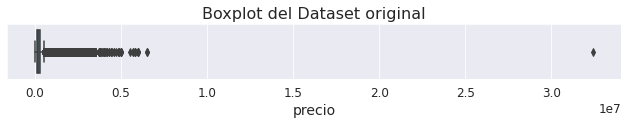

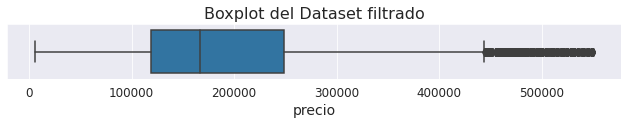

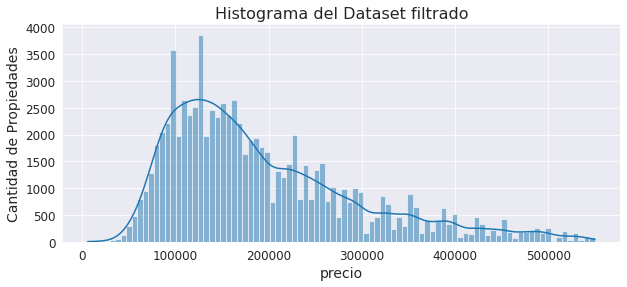

In [ ]:
dist_plot(df, df2, 'precio')

In [ ]:
# Imprimo los estadísticos del dataset
df.describe()

,lat,lon,ambientes,dormitorios,baños,sup_total,sup_cubierta,precio
count,85493.0000,85479.0000,89874.0000,89874.0000,87727.0000,81157.0000,80850.0000,89874.0000
mean,-34.5991,-58.4361,2.9651,1.9605,1.5586,112.8855,95.1697,258719.4967
std,0.0240,0.0364,1.3175,1.0744,0.8584,989.1338,785.1774,319076.1589
min,-34.6964,-58.5305,1.0000,0.0000,1.0000,10.0000,1.0000,6000.0000
25%,-34.6139,-58.4598,2.0000,1.0000,1.0000,49.0000,44.0000,120000.0000
50%,-34.5994,-58.4338,3.0000,2.0000,1.0000,71.0000,63.0000,175000.0000
75%,-34.5841,-58.4099,4.0000,3.0000,2.0000,111.0000,96.0000,278200.0000
max,-34.5358,-58.3539,26.0000,15.0000,14.0000,126062.0000,126062.0000,32434232.0000


La superficie mínima (tanto la total como la cubierta) siguen siendo muy chicas (valores de 1 $m^2$ y 10 $m^2$ que no tienen sentido para ser viviendas), por lo que voy a filtrar el dataset para superficies mayores a 25 $m^2$.

In [ ]:
mask = np.logical_or(df.sup_total < 25, df.sup_cubierta < 25)
df2 = df2[~mask]
df2.shape

(82237, 10)

A continuación realizamos algunas verificaciones extra: que no haya `sup_cubierta` > `sup_total`.

In [ ]:
# Verifico que la superfice cubierta no sea mayor que la total
# A continuación vamos a filtrar aquellas propiedades que posean 'surface_covered' > 'surface_total' ya que son  inconsistencias del dataset.
mascara = (df2.sup_cubierta) > (df2.sup_total)
print("La cantidad de instancias que tienen 'sup_cubierta' mayor que 'sup_total' es:", df2[mascara].shape[0])

La cantidad de instancias que tienen 'sup_cubierta' mayor que 'sup_total' es: 662


In [ ]:
# Reasignamos esas instancias con el valor de `sup_total`
df2.loc[mascara, 'sup_cubierta'] = df2.loc[mascara, 'sup_total']

In [ ]:
df2.describe()

,lat,lon,ambientes,dormitorios,baños,sup_total,sup_cubierta,precio
count,78671.0000,78657.0000,82237.0000,82237.0000,80169.0000,73959.0000,73643.0000,82237.0000
mean,-34.6000,-58.4379,2.8374,1.8634,1.4313,102.1243,82.4507,195664.0711
std,0.0240,0.0358,1.1779,1.0037,0.6920,1033.1542,805.8293,102450.2996
min,-34.6964,-58.5305,1.0000,0.0000,1.0000,25.0000,25.0000,6000.0000
25%,-34.6150,-58.4614,2.0000,1.0000,1.0000,48.0000,44.0000,120000.0000
50%,-34.6007,-58.4349,3.0000,2.0000,1.0000,68.0000,60.0000,168000.0000
75%,-34.5860,-58.4127,4.0000,2.0000,2.0000,99.0000,85.0000,249000.0000
max,-34.5358,-58.3539,21.0000,15.0000,14.0000,126062.0000,126062.0000,549999.0000


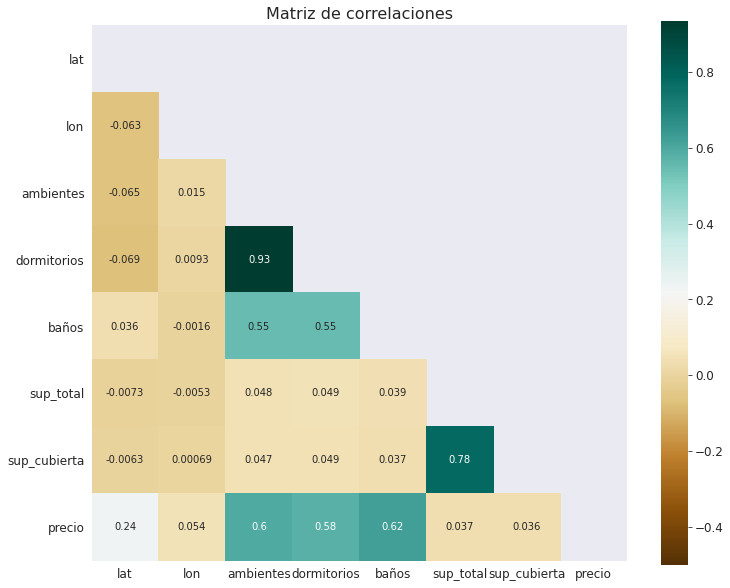

In [ ]:
# Defino función para crear la matriz de correlaciones
def hmap(df):
  plt.figure(figsize=(12,10))
  corr_matrix = df.corr()
  mask = np.zeros_like(corr_matrix)
  mask[np.triu_indices_from(mask)] = True
  sns.heatmap(corr_matrix, vmin=-0.5, annot=True, square=True, mask=mask, cmap='BrBG')
  plt.title('Matriz de correlaciones')
  plt.show()
  
# Y lo imprimo en pantalla
hmap(df2)

#### **Elección de transformaciones**

##### Encoding

In [ ]:
print('Cantidad de instancias por variable categórica')
print('Tipo:', len(set(df2.tipo)))
print('Barrio:', len(set(df2.barrio)))

Cantidad de instancias por variable categórica
Tipo: 3
Barrio: 57


Vamos a realizar el encoding de las variables categóricas (***barrio*** y ***tipo***) para poder utilizar éstos atributos como input del modelo predictor. Las 2 variables son de tipo nominal, por lo que lo recomendado es usar ***One Hot Enconding***. Sin embargo, la columna ***barrio*** presenta muchas instancias distintas, por lo que realizar un One Hot Encoding generaría muchas columnas adicionales y encarecería el procesamiento de los datos. Por esto, utilizaré ***Target Encoding*** para las variables categóricas.

***Target Encoding:***

Este tipo de encoding permite 'ayudar' al modelo, dar alguna pauta de la relación que existe entre los valores de variables categóricas.
Por ejemplo, si hacemos encoding de los `barrios` con relación a la variable `precio`, se podría inferir que a valores más altos de `barrio_code` se corresponden, por lo general, valores más altos de `precio`. 

##### Análisis de Valores Faltantes

In [ ]:
# Cantidad de valores faltantes por columna del dataset
faltantes = pd.DataFrame(df2.isnull().sum(), columns=['faltantes'])
faltantes

,faltantes
lat,3566
lon,3580
barrio,0
tipo,0
ambientes,0
dormitorios,0
baños,2068
sup_total,8278
sup_cubierta,8594
precio,0


###### Faltantes de variable `baños`

Para solucionar el tema de los valores faltantes de la variable `baños` podría imputarlos con el valor de la media de `baños` para cada `tipo` de propiedad.

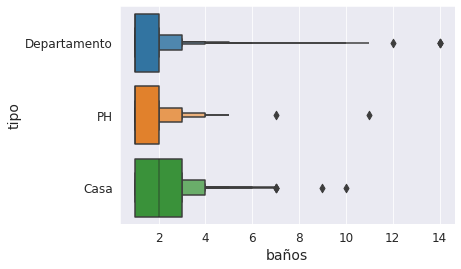

In [ ]:
sns.boxenplot(data=df2, y='tipo', x='baños')
plt.show()

In [ ]:
# La media de la variable `baños` por cada tipo de propiedad
moda_baños_por_tipo = df2.groupby(['tipo']).mean().baños.round().reset_index(name='media_baños')
moda_baños_por_tipo

,tipo,media_baños
0,Casa,2.0000
1,Departamento,1.0000
2,PH,2.0000


###### Faltantes de variable `sup_total` y `sup_cubierta`

Para los casos en que sólo falta una de las superficies, imputaría el valor de la faltante con el valor de la otra.
Para el caso en que faltan ambas superficies las imputaría calculando el precio por metro cuadrado promedio de cada barrio y luego calculo la superficie total dividiendo el `precio` por el `precio_m2` calculado por `barrio`.

###### Faltantes de variables `lat` y `lon`

In [ ]:
# Separo los datos que tienen missings de superficie (total o cubierta)
mask = np.logical_or(df2.lat.isna(), df2.lon.isna())
faltantes_coord = df2[mask]

def coord_faltante(row):
  if np.logical_and(pd.isna(row.lat), pd.isna(row.lon)):
    return 'ambas'
  elif np.logical_and(pd.isna(row.lat), ~pd.isna(row.lon)):
    return 'latitud'
  elif np.logical_and(~pd.isna(row.lat), pd.isna(row.lon)):
    return 'longitud'
  else:
    return 'ninguna'

faltantes_coord['falta coordenada'] = faltantes_coord.apply(coord_faltante, axis=1)
faltantes_coord.head()

,lat,lon,barrio,tipo,ambientes,dormitorios,baños,sup_total,sup_cubierta,precio,falta coordenada
35,nan,nan,Palermo,Departamento,2.0000,1.0000,2.0000,81.0000,76.0000,410000.0000,ambas
36,nan,nan,Palermo,Departamento,2.0000,1.0000,1.0000,42.0000,38.0000,169000.0000,ambas
46,nan,nan,Palermo,Departamento,2.0000,1.0000,1.0000,52.0000,46.0000,159500.0000,ambas
59,nan,nan,Palermo,Departamento,2.0000,1.0000,1.0000,42.0000,38.0000,169000.0000,ambas
86,nan,nan,Balvanera,Departamento,2.0000,1.0000,1.0000,43.0000,40.0000,109000.0000,ambas


In [ ]:
faltantes_coord.groupby('falta coordenada').count().precio.reset_index(name='missings')

,falta coordenada,missings
0,ambas,3566
1,longitud,14


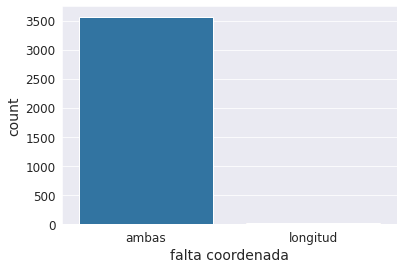

In [ ]:
sns.countplot(data=faltantes_coord, x='falta coordenada')
plt.show()

En este caso completaría las coordenadas `lat` y `lon` de modo de imputarles el promedio de los valores correspondientes a los `barrios` a los cuales pertenecen las instancias.

In [ ]:
df_con_coord = df2[~mask]
barrios = df_con_coord.groupby(by='barrio').mean()[['lat', 'lon']].reset_index()
barrios.head()

,barrio,lat,lon
0,Abasto,-34.6042,-58.4128
1,Agronomía,-34.5938,-58.4905
2,Almagro,-34.6057,-58.4216
3,Balvanera,-34.6101,-58.4032
4,Barracas,-34.6386,-58.3758


##### Detección y Eliminación de Outliers

#### **Implementación de transformaciones**

##### Pipeline

Las opciones elegidas para la imputación de missings son un tanto complejas (imputar con la media de una variable agrupada por otra variable). Además, la intención es utilizar *Pipelines* para realizar las transformaciones de los datos (ya que permitiría agilizar el preprocesamiento).
Por lo tanto, vamos a crear una clase que permita realizar las imputaciones de manera *custom*.

In [ ]:
# Importamos las librerías necesarias
from sklearn.base import BaseEstimator, TransformerMixin
# Y creamos una clase 'custom' para realizar las imputaciones de manera de poder
# imputar una 'variable' con el valor medio calculado, agrupando por la columna 'by'
# El argumento 'int' permite imputar números enteros al redondear las medias calculadas.

class CustomImputer(BaseEstimator, TransformerMixin):
     def __init__(self, variable, by, int = False):
          self.variable = variable
          self.by = by
          return None

     def fit(self, X, y=None):
          self.map = X.groupby(self.by)[self.variable].mean()
          return self

     def transform(self, X, y=None):
          if int:
            X[self.variable].fillna(value = round(X[self.by].map(self.map)), inplace=True)
          else:
            X[self.variable].fillna(value = X[self.by].map(self.map), inplace=True)
          return X

In [ ]:
# Antes que nada, definimos X e y
X = df2.copy()
X.drop(columns=['precio'], inplace=True)
y = df2['precio']

In [ ]:
X.shape, y.shape

((82237, 9), (82237,))

In [ ]:
# Realizamos la división entre datos de entrenamiento y de testeo.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [ ]:
X_train.shape

(57565, 9)

In [ ]:
y_train.shape

(57565,)

In [ ]:
X_train.isna().sum()

lat             2493
lon             2501
barrio             0
tipo               0
ambientes          0
dormitorios        0
baños           1459
sup_total       5802
sup_cubierta    6026
dtype: int64

In [ ]:
X_test.isna().sum()

lat             1073
lon             1079
barrio             0
tipo               0
ambientes          0
dormitorios        0
baños            609
sup_total       2476
sup_cubierta    2568
dtype: int64

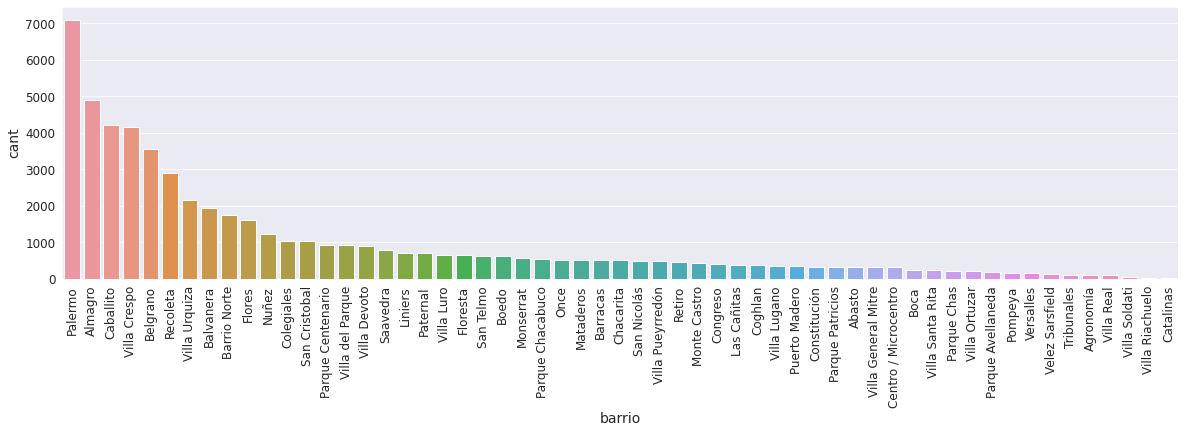

In [ ]:
data = X_train.groupby(by='barrio').count().lat.reset_index().rename(columns={'lat':'cant'}).sort_values('cant', ascending=False)
plt.figure(figsize=(20,5))
sns.barplot(data=data, x='barrio', y='cant')
plt.xticks(rotation=90)
plt.show()

###### Implementación del pipeline

In [ ]:
# Importamos las librerías
from imblearn.pipeline import Pipeline
# Y ahora instanciamos un Pipeline

pipeline = Pipeline(steps = [
                             ('latImputer', CustomImputer('lat','barrio')),
                             ('lonImputer', CustomImputer('lon','barrio')),
                             ('sup_totalImputer', CustomImputer('sup_total','barrio')),
                             ('sup_cubiertaImputer', CustomImputer('sup_cubierta','barrio')),
                             ('bañosImputer', CustomImputer('baños','sup_total', int = True)),
                             ('rareEncoder', RareLabelEncoder(tol=0.01, n_categories=5, replace_with='Otros')),
                             ('catEncoder', MeanEncoder()),
                            #  ('outlier_removal', Winsorizer(variables=None, capping_method='quantiles', fold=0.05, missing_values='ignore')), # removemos outliers en los percentiles 5 y 95
                             ('outlier_removal', OutlierTrimmer(variables=None, capping_method='quantiles', fold=0.05, missing_values='ignore', tail='both')), # removemos outliers en los percentiles 5 y 95
                             ])

In [ ]:
pipe_fitted= pipeline.fit(X_train, y_train)

In [ ]:
pipe_fitted['catEncoder'].encoder_dict_

{'barrio': {'Almagro': 178184.49721115537,
  'Balvanera': 140134.3765060241,
  'Barrio Norte': 236654.46355236138,
  'Belgrano': 250448.94757131842,
  'Boedo': 152017.13548387098,
  'Caballito': 200491.00275608635,
  'Colegiales': 200060.740234375,
  'Flores': 171827.38119953865,
  'Floresta': 150548.9192546584,
  'Liniers': 159742.43281471005,
  'Nuñez': 228198.93290734824,
  'Otros': 173824.73062237495,
  'Palermo': 228485.32229580573,
  'Parque Centenario': 197914.8176914779,
  'Paternal': 161592.20542082738,
  'Recoleta': 267077.454488583,
  'Saavedra': 186176.47051282052,
  'San Cristobal': 120415.62786259541,
  'San Telmo': 154249.38109756098,
  'Villa Crespo': 164472.54939587775,
  'Villa Devoto': 208157.36992316137,
  'Villa Luro': 149204.8274268105,
  'Villa Urquiza': 195236.45880746472,
  'Villa del Parque': 177580.00327868853},
 'tipo': {'Casa': 302007.1162638798,
  'Departamento': 190180.8886507471,
  'PH': 210194.371750038}}

In [ ]:
X_train_prep = pipe_fitted.transform(X_train)
X_test_prep = pipe_fitted.transform(X_test)

In [ ]:
y_train = y_train[X_train_prep.index]

In [ ]:
X_train_prep.shape

(39200, 9)

In [ ]:
y_train.shape

(39200,)

In [ ]:
df_out = pd.concat([X_train_prep, y_train], axis=1)
df_out

,lat,lon,barrio,tipo,ambientes,dormitorios,baños,sup_total,sup_cubierta,precio
97832,-34.5900,-58.4238,228485.3223,190180.8887,2.0000,1.0000,1.0000,52.0000,48.0000,188000.0000
146456,-34.5769,-58.4365,228485.3223,190180.8887,2.0000,1.0000,2.0000,50.0000,44.0000,215000.0000
70710,-34.5906,-58.3952,267077.4545,190180.8887,3.0000,2.0000,1.0000,48.0000,48.0000,155000.0000
88148,-34.5660,-58.4352,173824.7306,190180.8887,2.0000,1.0000,1.0000,72.0000,48.0000,215000.0000
141370,-34.5936,-58.4074,236654.4636,190180.8887,4.0000,3.0000,3.0000,140.0000,140.0000,390000.0000
...,...,...,...,...,...,...,...,...,...,...
93800,-34.6339,-58.4462,171827.3812,190180.8887,3.0000,2.0000,1.0000,61.0000,93.0000,143000.0000
71323,-34.5966,-58.4152,228485.3223,190180.8887,4.0000,3.0000,2.0000,140.0000,110.0000,295000.0000
78578,-34.5817,-58.4226,228485.3223,190180.8887,4.0000,3.0000,2.0000,128.0000,123.0000,396991.0000
74175,-34.5796,-58.4472,200060.7402,210194.3718,4.0000,3.0000,2.0000,105.0000,88.0000,287000.0000


In [ ]:
X_train_prep.describe()

,lat,lon,barrio,tipo,ambientes,dormitorios,baños,sup_total,sup_cubierta
count,39200.0000,39200.0000,39200.0000,39200.0000,39200.0000,39200.0000,39200.0000,39200.0000,39200.0000
mean,-34.5995,-58.4329,196769.3165,192137.8193,2.7557,1.7854,1.3606,75.2324,66.0967
std,0.0195,0.0306,34107.0502,5944.4362,0.8615,0.7489,0.5706,30.5772,24.8900
min,-34.6644,-58.5030,140134.3765,190180.8887,1.0000,1.0000,1.0000,35.0000,33.0000
25%,-34.6110,-58.4514,173824.7306,190180.8887,2.0000,1.0000,1.0000,50.0000,46.0000
50%,-34.5994,-58.4313,178184.4972,190180.8887,3.0000,2.0000,1.0000,70.0000,61.0000
75%,-34.5874,-58.4127,228485.3223,190180.8887,3.0000,2.0000,2.0000,94.0000,80.0000
max,-34.5583,-58.3637,267077.4545,210194.3718,5.0000,3.0000,3.0000,180.0000,148.0000


In [ ]:
# Verifico que no tengo más missings.
df_out.isna().sum()

lat             0
lon             0
barrio          0
tipo            0
ambientes       0
dormitorios     0
baños           0
sup_total       0
sup_cubierta    0
precio          0
dtype: int64

###### Distplots

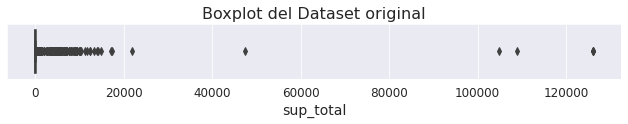

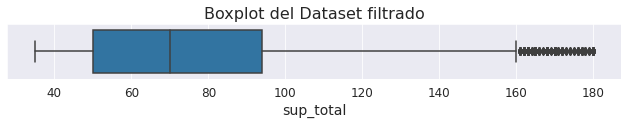

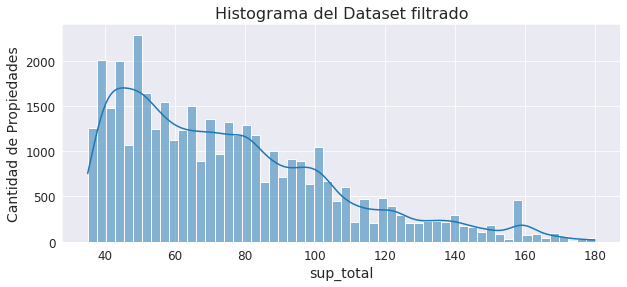

In [ ]:
dist_plot(df, X_train_prep, 'sup_total')

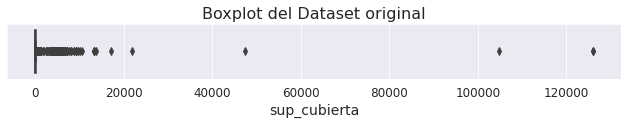

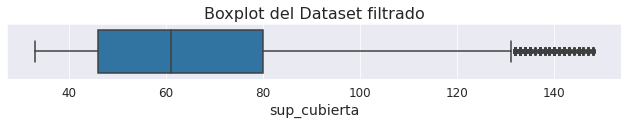

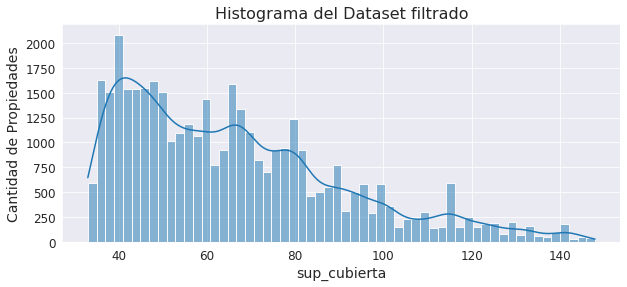

In [ ]:
cols = ['sup_total', 'sup_cubierta', 'precio', 'ambientes', 'dormitorios', 'baños']
dist_plot(df, X_train_prep, cols[1])

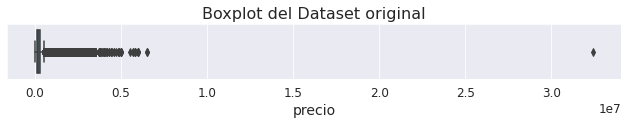

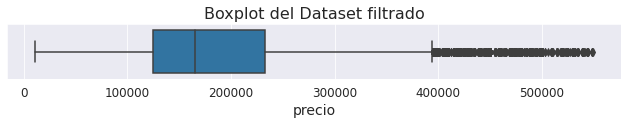

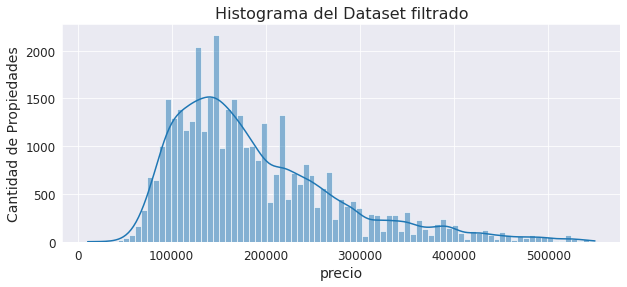

In [ ]:
dist_plot(df, y_train.reset_index(name='precio'), cols[2])

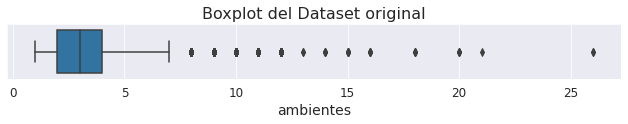

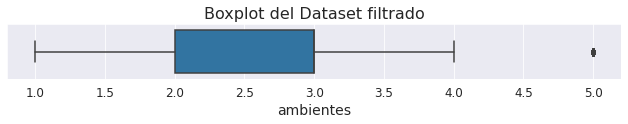

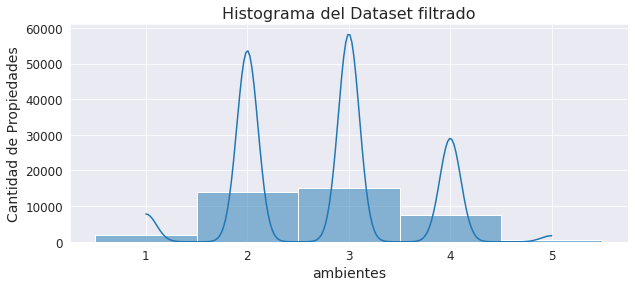

In [ ]:
dist_plot(df, X_train_prep, cols[3], True, 1)

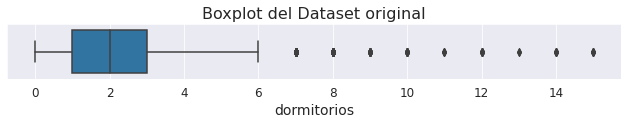

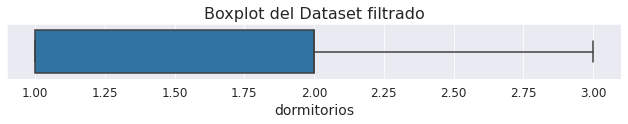

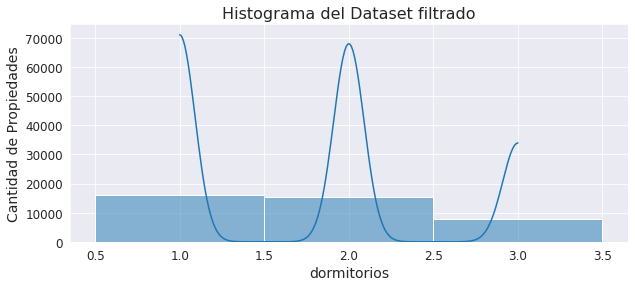

In [ ]:
dist_plot(df, X_train_prep, cols[4], True, 1)

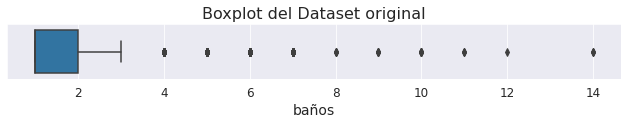

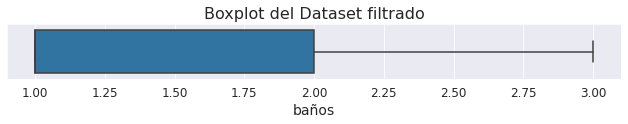

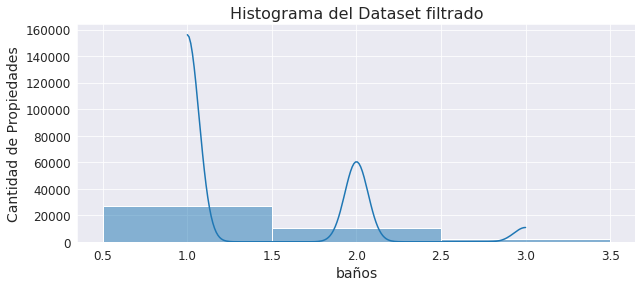

In [ ]:
dist_plot(df, X_train_prep, cols[5], True, 1)

#### **Reentrenamiento de <u>Modelo Sprint 1<u>**

##### Reentrenamiento de modelo

In [ ]:
# Definimos las variables de predictoras y la variable a predecir
X_train, X_test, y_train, y_test = X_train_prep, X_test_prep, y_train[X_train_prep.index], y_test[X_test_prep.index]

In [ ]:
# Verificamos los tamaños de las X e y
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(39200, 9)
(39200,)
(16813, 9)
(16813,)


In [ ]:
# Importamos las librerías de los modelos a utilizar
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Instanciamos lo modelos
linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=13, random_state=0, max_features=2, criterion='mae')
knn_regressor = KNeighborsRegressor(n_neighbors=3)

In [ ]:
# Entrenamos los modelos
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 50891.82802660051
Raíz del error cuadrático medio en Test: 51362.941488580516


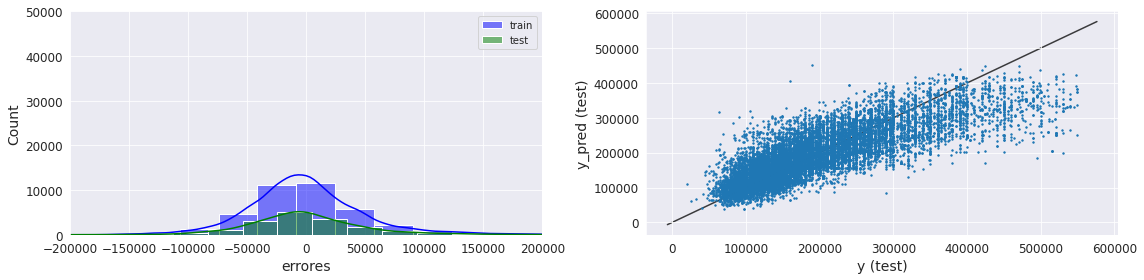

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 36357.49801590247
Raíz del error cuadrático medio en Test: 43325.34880424286


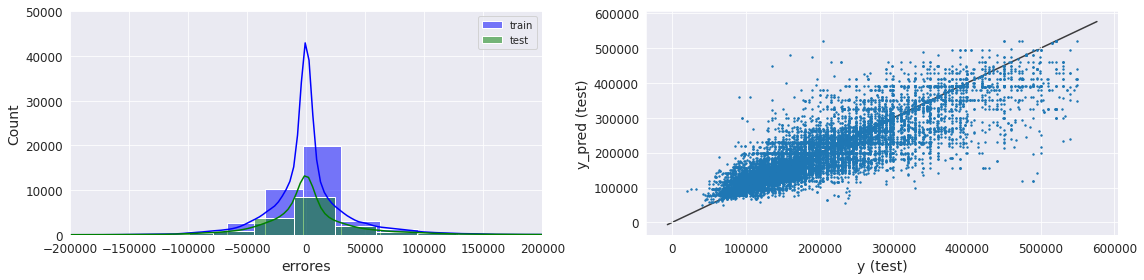

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 25789.92796661733
Raíz del error cuadrático medio en Test: 39479.93181998281


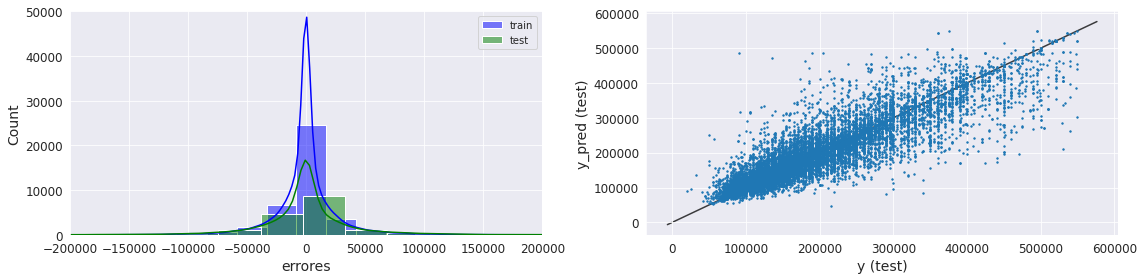

In [ ]:
# Luego analizamos la distribución de los errores de las predicciones de cada modelo
# y calculamos la raíz del error cuadrático medio de la cada modelo con los hiperparámetros utilizados
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (16,4))

    plt.subplot(1,2,1)
    sns.histplot(y_train - y_train_pred, bins = 20, label = 'train', kde=True, color='blue')
    sns.histplot(y_test - y_test_pred, bins = 20, label = 'test', kde=True, color='green')
    plt.xlabel('errores')
    plt.xlim(-200000, 200000)
    plt.ylim(0, 50000)
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

In [ ]:
# Ahora vamos a analizar el R2 que puede darnos una idea más comparable del 
# ajuste de los datos predichos con los datos reales de la muestra.
# Importamos la metrica
from sklearn.metrics import r2_score

In [ ]:
# Primero calculamos el R^2 del benchmark: Modelo de Regresión Lineal
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)
r2_train_lin = r2_score(y_train,y_train_pred)
r2_test_lin = r2_score(y_test,y_test_pred)
print("r2_train_lin: %.2f" % r2_train_lin)
print("r2_test_lin: %.2f" % r2_test_lin)
print("RMSE train: %.2f" % mean_squared_error(y_train, y_train_pred, squared=False))
print("RMSE test: %.2f" % mean_squared_error(y_test, y_test_pred, squared=False))

r2_train_lin: 0.67
r2_test_lin: 0.67
RMSE train: 50891.83
RMSE test: 51362.94


In [ ]:
from tqdm.notebook import tqdm

In [ ]:
# Vamos a calcular los R2 variando los hiperparámetros de entrenamiento del modelo
# Definimos las listas vacias para los valores de accuracy deseados
lista_rsme_train = []
lista_rsme_test = []
lista_r2_train = []
lista_r2_test = []

# Definimos la lista de valores de k que vamos a explorar
max_depths = np.arange(1,25, 1)

# Generamos un loop sobre los distintos valores de k 
for d in tqdm(max_depths):
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf = DecisionTreeRegressor(max_depth = d)
    
    # Entrenar el modelo
    clf.fit(X_train, y_train)
    

    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_train = r2_score(y_train, y_train_pred)
    # train_acc = clf.score(X_train, y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)
    # test_acc = clf.score(X_test, y_test_pred)
    
    # Agregar la información a las listas
    lista_rsme_train.append(rmse_train)
    lista_rsme_test.append(rmse_test)
    lista_r2_train.append(r2_train)
    lista_r2_test.append(r2_test)
  

  0%|          | 0/24 [00:00<?, ?it/s]

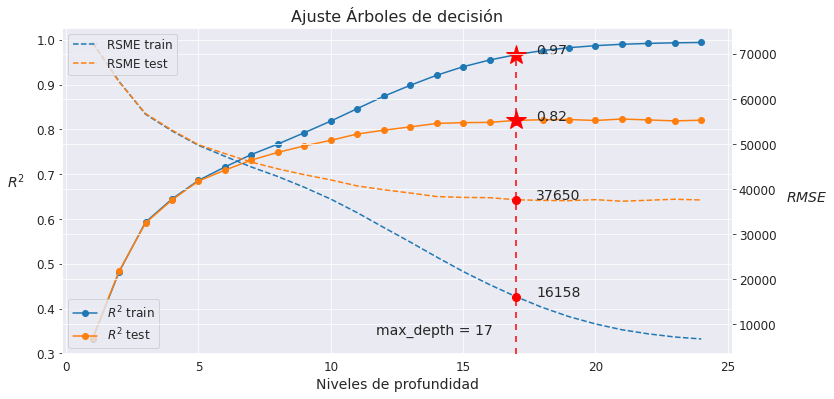

In [ ]:
# A continuación creamos el gráfico de los R^2 en función de los niveles de profundidad máxima del modelo de Árboles de decisión.
# Adicionalmente, marcamos el punto óptimo que maximiza el R2 en los datos de testeo.
# Este punto sería el máximo a considerar para definir la profundidad del Árbol de decisión, ya que queremos minimizar el costo computacional de entrenamiento.

fig, ax1 = plt.subplots(figsize=(12,6))

x = max_depths
y1 = lista_r2_train
y2 = lista_r2_test
y3 = lista_rsme_train
y4 = lista_rsme_test

ax2 = ax1.twinx()
ax1.plot(x, y1, 'o-', label='$R^2$ train') # r2 train
ax1.plot(x, y2, 'o-', label='$R^2$ test') # r2 test
ax2.plot(x, y3, '--', label='RSME train', alpha=1) # rsme train
ax2.plot(x, y4, '--', label='RSME test', alpha=1) # rsme test

ax1.set_xlabel('Niveles de profundidad')
ax1.set_ylabel('$R^2$', rotation=0, size=14, labelpad=20)
ax2.set_ylabel('$RMSE$', rotation=0, size=14, labelpad=30)

max_depth = 17 # x[np.where(y2 == max_r2_test_tree)[0][0]]
max_r2_test_tree = lista_r2_test[np.where(max_depths == max_depth)[0][0]]

# max_r2_test_tree = max(y2)
# max_depth = x[np.where(y2 == max_r2_test_tree)[0][0]]
r_train_tree = y1[np.where(y2 == max_r2_test_tree)[0][0]]
rsme_test_tree = y3[np.where(y2 == max_r2_test_tree)[0][0]]
rsme_train_tree = y4[np.where(y2 == max_r2_test_tree)[0][0]]

ax1.plot(max_depth, max_r2_test_tree, '*r', markersize=20)
ax1.plot(max_depth, r_train_tree, '*r', markersize=20)
ax2.plot(max_depth, rsme_test_tree, 'or', markersize=8)
ax2.plot(max_depth, rsme_train_tree, 'or', markersize=8)
y_min = ax1.get_ylim()[0]
y_max = ax1.get_ylim()[1]
plt.axvline(x=max_depth, color='r', ymax=(r_train_tree - y_min) / (y_max-y_min), dashes=(4,4))

ax1.annotate(np.round(max_r2_test_tree,2), xy=(max_depth, max_r2_test_tree), xytext=(20, 0), size=14, xycoords='data', textcoords='offset points')
ax1.annotate(np.round(r_train_tree, 2), xy=(max_depth, r_train_tree), xytext=(20, 0), size=14,xycoords='data', textcoords='offset points')
ax1.annotate("max_depth = " + str(np.round(max_depth, 0)), xy=(max_depth, y_min), xytext=(-140, 20), size=14,xycoords='data', textcoords='offset points')
ax2.annotate(np.int(rsme_test_tree), xy=(max_depth, rsme_test_tree), xytext=(20, 0), size=14, xycoords='data', textcoords='offset points')
ax2.annotate(np.int(rsme_train_tree), xy=(max_depth, rsme_train_tree), xytext=(20, 0), size=14,xycoords='data', textcoords='offset points')

plt.title('Ajuste Árboles de decisión')
ax1.legend(fontsize=12, loc='lower left')
ax2.legend(fontsize=12, loc='upper left')

plt.show()

In [ ]:
# Repetimos lo anterior, pero para el modelo de Vecinos más cercanos
# Definimos las listas vacias para los valores de accuracy deseados
lista_rsme_train = []
lista_rsme_test = []
lista_r2_train = []
lista_r2_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = np.arange(1,26,1)

# Generamos un loop sobre los distintos valores de k 
for k in tqdm(k_vecinos):
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf = KNeighborsRegressor(n_neighbors = k)
    
    # Entrenar el modelo
    clf.fit(X_train, y_train)

    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_train = r2_score(y_train, y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)
    
    # Agregar la información a las listas
    lista_rsme_train.append(rmse_train)
    lista_rsme_test.append(rmse_test)
    lista_r2_train.append(r2_train)
    lista_r2_test.append(r2_test)

  0%|          | 0/25 [00:00<?, ?it/s]

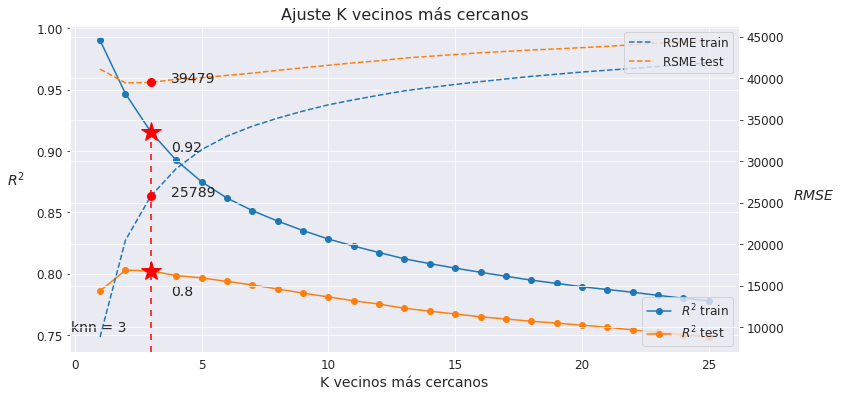

In [ ]:
# A continuación creamos el gráfico de los R^2 en función de la cantidad de vecinos del modelo de KNN.
fig, ax1 = plt.subplots(figsize=(12,6))

x = k_vecinos
y1 = lista_r2_train
y2 = lista_r2_test
y3 = lista_rsme_train
y4 = lista_rsme_test

ax2 = ax1.twinx()
ax1.plot(x, y1, 'o-', label='$R^2$ train') # r2 train
ax1.plot(x, y2, 'o-', label='$R^2$ test') # r2 test
ax2.plot(x, y3, '--', label='RSME train', alpha=1) # rsme train
ax2.plot(x, y4, '--', label='RSME test', alpha=1) # rsme test

ax1.set_xlabel('K vecinos más cercanos')
ax1.set_ylabel('$R^2$', rotation=0, size=14, labelpad=20)
ax2.set_ylabel('$RMSE$', rotation=0, size=14, labelpad=30)

n = 3 # x[np.where(y2 == max_r2_test_knn)[0][0]]
max_r2_test_knn = lista_r2_test[np.where(k_vecinos == n)[0][0]]

# max_r2_test_knn = max(y2)
# n = x[np.where(y2 == max_r2_test_knn)[0][0]]
r_train_knn = y1[np.where(y2 == max_r2_test_knn)[0][0]]
rsme_test_knn = y3[np.where(y2 == max_r2_test_knn)[0][0]]
rsme_train_knn = y4[np.where(y2 == max_r2_test_knn)[0][0]]

ax1.plot(n, max_r2_test_knn, '*r', markersize=20)
ax1.plot(n, r_train_knn, '*r', markersize=20)
ax2.plot(n, rsme_test_knn, 'or', markersize=8)
ax2.plot(n, rsme_train_knn, 'or', markersize=8)
y_min = ax1.get_ylim()[0]
y_max = ax1.get_ylim()[1]
plt.axvline(x=n, color='r', ymax=(r_train_knn - y_min) / (y_max-y_min), dashes=(4,4))

ax1.annotate(np.round(max_r2_test_knn,2), xy=(n, max_r2_test_knn), xytext=(20, -25), size=14, xycoords='data', textcoords='offset points')
ax1.annotate(np.round(r_train_knn, 2), xy=(n, r_train_knn), xytext=(20, -20), size=14,xycoords='data', textcoords='offset points')
ax1.annotate("knn = " + str(np.round(n, 0)), xy=(n, y_min), xytext=(-80, 20), size=14,xycoords='data', textcoords='offset points')
ax2.annotate(np.int(rsme_test_knn), xy=(n, rsme_test_knn), xytext=(20, 0), size=14, xycoords='data', textcoords='offset points')
ax2.annotate(np.int(rsme_train_knn), xy=(n, rsme_train_knn), xytext=(20, 0), size=14,xycoords='data', textcoords='offset points')

plt.title('Ajuste K vecinos más cercanos')
ax1.legend(fontsize=12, loc='lower right')
ax2.legend(fontsize=12, loc='upper right')

plt.show()

##### Evaluación de desempeño

In [ ]:
# Resultados del SPRINT 1
res1 = pd.DataFrame([['-', 0.55, 0.55],[17, 0.95, 0.77],[3, 0.88, 0.75]], 
                   columns=['Parámetro', 'R2_train', 'R2_test'], index=['LIN', 'TREE', 'KNN'])
res1 = res1.transpose()

In [ ]:
# Creamos una tabla con los resultados DEL SPRINT 2
res2 = pd.DataFrame([['-', np.round(r2_train_lin, 2), np.round(r2_test_lin, 2)],
                    [max_depth, np.round(r_train_tree, 2), np.round(max_r2_test_tree, 2)], 
                    [n, np.round(r_train_knn, 2), np.round(max_r2_test_knn, 2)]], 
                   columns=['Parámetro', 'R2_train', 'R2_test'], index=['LIN', 'TREE', 'KNN'])
res2 = res2.transpose()

In [ ]:
# Finalmente muestro los resultados comparados
# LIN = Regresión lineal
# TREE = Modelo de Árboles de decisión
# LIN = Regresión lineal
res_total = pd.concat([res1, res2], axis=1)
res_total.columns = [['','SPRINT 1','', '','SPRINT 2',''], ['LIN', 'TREE', 'KNN', 'LIN', 'TREE', 'KNN']]
res_total

SPRINT 1               SPRINT 2       
             LIN     TREE    KNN    LIN     TREE    KNN
Parámetro      -       17      3      -       17      3
R2_train  0.5500   0.9500 0.8800 0.6700   0.9700 0.9200
R2_test   0.5500   0.7700 0.7500 0.6700   0.8200 0.8000

Al comparar los resultados de la aplicación de los modelos del **Sprint 1** a los datos preprocesados en el **Sprint 2**, se puede observar una clara mejora en las métricas, tanto en *train* como en *test*. En principio, se puede concluir que las nuevas implementaciones utilizadas en la limpieza del dataset influyó positivamente en el desempeño de las predicciones.

### **Modelos Avanzados**
***

#### **Elección, Entrenamiento y Evaluación de Modelos Avanzados**

##### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# clf = RandomForestRegressor(n_estimators=100, max_features='sqrt', n_jobs=-1, oob_score = True, random_state = 0)
clf = RandomForestRegressor(random_state = 0)
clf.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
import sklearn.metrics as metrics

In [ ]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print("r2 train: %.2f" % metrics.r2_score(y_train, y_train_pred))
print("r2 test: %.2f" % metrics.r2_score(y_test, y_test_pred))
print("RMSE train: %.2f" % metrics.mean_squared_error(y_train, y_train_pred, squared=False))
print("RMSE test: %.2f" % metrics.mean_squared_error(y_test, y_test_pred, squared=False))

r2 train: 0.98
r2 test: 0.89
RMSE train: 12119.02
RMSE test: 29367.39


In [ ]:
df_importances = pd.DataFrame(np.transpose([X_train.columns, clf.feature_importances_]), columns=['feature','importance']).sort_values(by='importance', ascending=False)

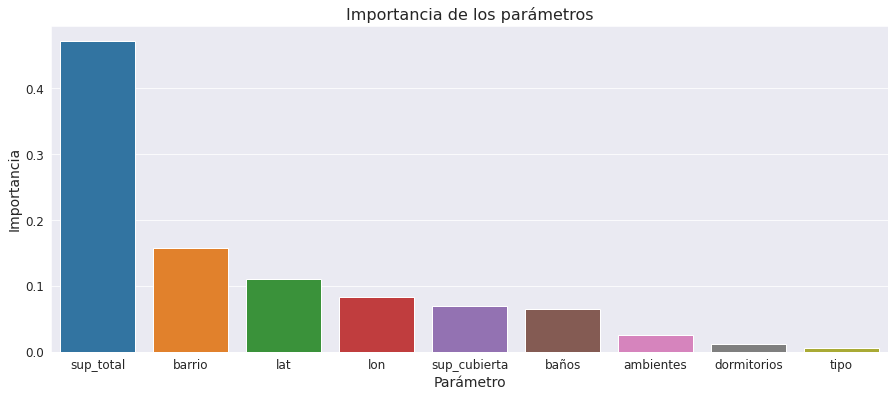

In [ ]:
plt.figure(figsize = (15,6))
sns.barplot(data=df_importances, x='feature', y='importance')
plt.title('Importancia de los parámetros')
plt.ylabel('Importancia')
plt.xlabel('Parámetro')
plt.show()

##### XGBoost

In [ ]:
# Importamos la librería
import xgboost as xgb

In [ ]:
# xgbr = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=0)
xgbr = xgb.XGBRegressor(random_state=0)
xgbr.fit(X_train, y_train)

y_train_pred = xgbr.predict(X_train)
y_test_pred = xgbr.predict(X_test)
rmse_train = mean_squared_error(y_train, y_train_pred)
rmse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("r2 train: %.2f" % r2_train)
print("r2 test: %.2f" % r2_test)
print("RMSE train: %.2f" % (rmse_train**(1/2.0)))
print("RMSE test: %.2f" % (rmse_test**(1/2.0)))

[19:36:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2 train: 0.77
r2 test: 0.76
RMSE train: 42399.37
RMSE test: 43584.53


#### **Optimización de hiperparámetros**

##### XGBoost - Optimización Manual 

In [ ]:
# Implementamos la optimización de XGBoost variando el hiperparámetro 'max_depth'
max_depths = np.arange(0,25)
rsme_train_list = []
rsme_test_list = []
r2_train_list = []
r2_test_list = []

for d in tqdm(max_depths, desc='Progreso: '):

  xgbr = xgb.XGBRegressor(max_depth=d, objective='reg:squarederror', n_estimators=100, random_state=0)
  xgbr.fit(X_train, y_train)
  
  y_train_pred = xgbr.predict(X_train)
  y_test_pred = xgbr.predict(X_test)
  rsme_train = mean_squared_error(y_train, y_train_pred)**(1/2.0)
  rsme_test = mean_squared_error(y_test, y_test_pred)**(1/2.0)
  r2_train = r2_score(y_train, y_train_pred)
  r2_test = r2_score(y_test, y_test_pred)

  rsme_train_list.append(rsme_train)
  rsme_test_list.append(rsme_test)
  r2_train_list.append(r2_train)
  r2_test_list.append(r2_test)

Progreso:   0%|          | 0/25 [00:00<?, ?it/s]

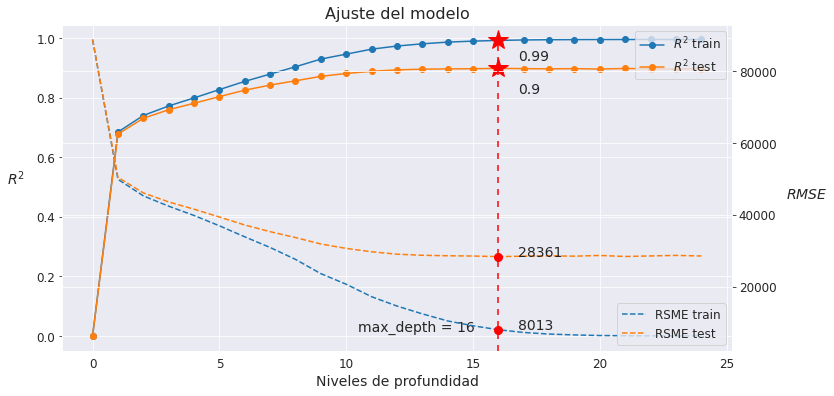

In [ ]:
# Graficamos el desempeño del modelo para distintos 'niveles de profundidad'
fig, ax1 = plt.subplots(figsize=(12,6))

x = max_depths
y1 = r2_train_list
y2 = r2_test_list
y3 = rsme_train_list
y4 = rsme_test_list

ax2 = ax1.twinx()
ax1.plot(x, y1, 'o-', label='$R^2$ train') # r2 train
ax1.plot(x, y2, 'o-', label='$R^2$ test') # r2 test
ax2.plot(x, y3, '--', label='RSME train', alpha=1) # rsme train
ax2.plot(x, y4, '--', label='RSME test', alpha=1) # rsme test

ax1.set_xlabel('Niveles de profundidad')
ax1.set_ylabel('$R^2$', rotation=0, size=14, labelpad=20)
ax2.set_ylabel('$RMSE$', rotation=0, size=14, labelpad=30)

max_r2_test_tree = max(y2)
max_depth = x[np.where(y2 == max_r2_test_tree)[0][0]]
r_train_tree = y1[np.where(y2 == max_r2_test_tree)[0][0]]
rsme_train_tree = y3[np.where(y2 == max_r2_test_tree)[0][0]]
rsme_test_tree = y4[np.where(y2 == max_r2_test_tree)[0][0]]

ax1.plot(max_depth, max_r2_test_tree, '*r', markersize=20)
ax1.plot(max_depth, r_train_tree, '*r', markersize=20)
ax2.plot(max_depth, rsme_test_tree, 'or', markersize=8)
ax2.plot(max_depth, rsme_train_tree, 'or', markersize=8)
y_min = ax1.get_ylim()[0]
y_max = ax1.get_ylim()[1]
plt.axvline(x=max_depth, color='r', ymax=(r_train_tree - y_min) / (y_max-y_min), dashes=(4,4))

ax1.annotate(np.round(max_r2_test_tree,2), xy=(max_depth, max_r2_test_tree), xytext=(20, -25), size=14, xycoords='data', textcoords='offset points')
ax1.annotate(np.round(r_train_tree, 2), xy=(max_depth, r_train_tree), xytext=(20, -20), size=14,xycoords='data', textcoords='offset points')
ax1.annotate("max_depth = " + str(np.round(max_depth, 0)), xy=(max_depth, y_min), xytext=(-140, 20), size=14,xycoords='data', textcoords='offset points')
ax2.annotate(np.int(rsme_train_tree), xy=(max_depth, rsme_train_tree), xytext=(20, 0), size=14,xycoords='data', textcoords='offset points')
ax2.annotate(np.int(rsme_test_tree), xy=(max_depth, rsme_test_tree), xytext=(20, 0), size=14, xycoords='data', textcoords='offset points')

plt.title('Ajuste del modelo')
ax1.legend(fontsize=12, loc='upper right')
ax2.legend(fontsize=12, loc='lower right')

plt.show()

In [ ]:
print("r2 train: %.2f" % r_train_tree)
print("r2 test: %.2f" % max_r2_test_tree)
print("RMSE train: %.2f" % rsme_train_tree)
print("RMSE test: %.2f" % rsme_test_tree)

r2 train: 0.99
r2 test: 0.90
RMSE train: 8013.23
RMSE test: 28361.69


##### Random Forest - Optimizado con GPMINIMIZE

In [ ]:
# Creamos el objeto regresor
regressor = DecisionTreeRegressor(random_state=0)
# regressor = RandomForestRegressor(random_state=0)

In [ ]:
# Lo fitteamos a la data de train
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
# Definimos aquellos parámetros que queremos colocar, pero que queremos NO mover luego
FIXED_PARAMS = {         
                'random_state': 0,           
                     }

Ahora definiremos el espacio de búsqueda. Es decir, entre que valores vamos a buscar los hiperparámetros

In [ ]:
from skopt.space import Real, Integer, Categorical
cant_columnas = X_train.shape[1]
space= [          
        Categorical(['mse','mae'], name='criterion')
        ,Integer(2, 20, name='max_depth') # maxima profundidad de cada árbol (aquí sí es mejor que sean profundos, porque no se concatenan, son independientes)
        ,Integer(5, 50, name='min_samples_split') # mínima cantidad de registros para abrir una rama
        ,Integer(2, 20, name='min_samples_leaf') # mínima cantidad de registros para abrir una hoja
        ,Integer(round(cant_columnas*0.1), round(cant_columnas*0.8), name='max_features') # máxima cantidad de atributos (columnas) que puede usar cada árbol
        # ,Integer(10, 200, name='n_estimators')
]
# listamos los nombres de los parámetros cuyo espacio de búsqueda acabamos de definir
param_names = ['criterion','max_depth','min_samples_split','min_samples_leaf','max_features'] #, 'n_estimators']

Definimos una funcion de métricas de evaluacion (para obtener RMSE)

In [ ]:
from sklearn.metrics import roc_auc_score, mean_squared_error
def eval_metrics(y_true, y_pred):
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    return rmse

Lo más importante: definimos todo lo que es nuestra "función objetivo". Es decir, lo que queremos que se haga en cada iteración!

In [ ]:
# Definimos la funcion objetivo, que se utilizará a cada iteración de la búsqueda
# creamos una lista para guardar los resultados
lista_results = []
lista_test_scores_cv = []
lista_train_scores_cv = []
lista_test_std_cv = []
lista_test_r2 = []
lista_train_r2 = []

from skopt.utils import use_named_args
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

@use_named_args(space)
def objective(**params):

    # seteamos los parámetros fijos
    regressor.set_params(**FIXED_PARAMS)
    # y los parámetros de cada iteración (se setearán automáticamente así)
    regressor.set_params(**params)
    
    ####################################################################################
    ############################# USAMOS CROSS VALIDATION ##############################
    ####################################################################################
    # Ahora en vez de eso calculamos nuestros scores de test de un cross validation
    # Recordemos, este objeto devuelve un array de todos los test_scores y tambien de los train_scores hallados --> nuestra loss será el promedio de los test_scores
    model_i_scores = cross_validate(regressor, X_train, y_train, cv=5, scoring=make_scorer(eval_metrics), return_train_score=True)
    mean_test_scores = model_i_scores['test_score'].mean()
    # Pero tambien nos guardamos los promedios de train para poder ver si en general se estuvo overfiteando o no 
    mean_train_scores = model_i_scores['train_score'].mean()
    # Por último, resulta interesante ver cuan volatil fueron esos test_scores. Así que tomamos su desvio standard (std)
    std_test_scores = model_i_scores['test_score'].std()
    # Tambien generamos los r cuadrado de train y de test
    model_i_scores_r2 = cross_validate(regressor, X_train, y_train, cv=5, scoring='r2', return_train_score=True)
    mean_test_scores_r2 = model_i_scores_r2['test_score'].mean()
    mean_train_scores_r2 = model_i_scores_r2['train_score'].mean()

    # Ahora guardamos estos datos en las listas vacias que creamos antes, así nos quedan bien guardados
    lista_test_scores_cv.append(mean_test_scores) # test
    lista_train_scores_cv.append(mean_train_scores) # train
    lista_test_std_cv.append(std_test_scores) # std de test
    lista_test_r2.append(mean_test_scores_r2) # r2 train
    lista_train_r2.append(mean_train_scores_r2) # r2 test
 
    # Definimos que la funcion de perdida sea el promedio de los scores de test
    loss = mean_test_scores
    ####################################################################################
    ####################################################################################
    ####################################################################################
    
    return loss 

In [ ]:
# Ejecutamos la búsqueda de los hiperparámetros 

from skopt import gp_minimize, forest_minimize, dump
# import joblib
from tqdm.notebook import tqdm

# Armamos una clase con tqdm para poder ver el progreso de la búsqueda
class tqdm_skopt(object):
    def __init__(self, **kwargs):
        self._bar = tqdm(**kwargs)
    def __call__(self, res):
        self._bar.update()

# Cantidad de iteraciones para la búsqueda (utilizar muchas, aqui usamos 50 solo por probar)
cantidad_iteraciones = 50

# Búsqueda
res = gp_minimize(
                    objective
                    ,space
                    ,n_calls = cantidad_iteraciones
                    ,n_initial_points = int(round(cantidad_iteraciones*0.2)) # Cantidad de iteraciones iniciales random (20% es significativo, pero dando mucho espacio para que el algoritmo optimice)
                    ,n_jobs=1
                    ,random_state = 0
                    ,verbose=10
                    ,callback=[tqdm_skopt(total=cantidad_iteraciones, desc="Progreso")]
                    )

Progreso:   0%|          | 0/50 [00:00<?, ?it/s]

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.6346
Function value obtained: 40930.5103
Current minimum: 40930.5103
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 91.3411
Function value obtained: 48094.2413
Current minimum: 40930.5103
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.4376
Function value obtained: 43282.9886
Current minimum: 40930.5103
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.6474
Function value obtained: 44052.1672
Current minimum: 40930.5103
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 108.9436
Function value obtained: 41884.6971
Current minimum: 409

In [ ]:
res.x

['mse', 59, 13, 12, 7]

In [ ]:
res.fun

38542.573993127975

In [ ]:
res.space

Space([Categorical(categories=('mse', 'mae'), prior=None),
       Integer(low=2, high=100, prior='uniform', transform='normalize'),
       Integer(low=10, high=100, prior='uniform', transform='normalize'),
       Integer(low=5, high=50, prior='uniform', transform='normalize'),
       Integer(low=1, high=7, prior='uniform', transform='normalize')])

In [ ]:
res.specs

{'args': {'acq_func': 'gp_hedge',
  'acq_optimizer': 'auto',
  'base_estimator': GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                           kernel=1**2 * Matern(length_scale=[1, 1, 1, 1, 1], nu=2.5),
                           n_restarts_optimizer=2, noise='gaussian',
                           normalize_y=True, optimizer='fmin_l_bfgs_b',
                           random_state=209652396),
  'callback': [<__main__.tqdm_skopt at 0x7febbaf6c7d0>],
  'dimensions': Space([Categorical(categories=('mse', 'mae'), prior=None),
         Integer(low=2, high=100, prior='uniform', transform='normalize'),
         Integer(low=10, high=100, prior='uniform', transform='normalize'),
         Integer(low=5, high=50, prior='uniform', transform='normalize'),
         Integer(low=1, high=7, prior='uniform', transform='normalize')]),
  'func': <function __main__.objective>,
  'initial_point_generator': 'random',
  'kappa': 1.96,
  'model_queue_size': None,
  'n_calls': 100,
  'n_in

Armamos un dataframe con los resultados

In [ ]:
resultados = pd.DataFrame(res.x_iters)
resultados.columns = param_names
resultados['funcion_costo'] = res.func_vals
resultados['numero_de_iteracion'] = resultados.reset_index()['index']
resultados['score_train'] = lista_train_scores_cv
resultados['score_test'] = lista_test_scores_cv
resultados['dif_train_test'] = resultados['score_test'] - resultados['score_train']
resultados['std_test'] = lista_test_std_cv
resultados['r2_train'] = lista_train_r2
resultados['r2_test'] = lista_test_r2
resultados.sort_values('r2_test', ascending=True, inplace=True)
resultados.reset_index(inplace=True)
resultados.head(20)

,index,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,funcion_costo,numero_de_iteracion,score_train,score_test,dif_train_test,std_test,r2_train,r2_test
0,13,mse,3,66,35,7,56532.3384,13,56408.9857,56532.3384,123.3528,393.5842,0.6115,0.6097
1,21,mae,60,42,47,2,47961.9006,21,46938.3408,47961.9006,1023.5598,983.9712,0.7309,0.7188
2,14,mse,52,15,25,1,47732.9204,14,46246.3168,47732.9204,1486.6036,536.4247,0.7388,0.7217
3,19,mae,56,25,22,2,46603.4858,19,44403.7874,46603.4858,2199.6984,477.9911,0.7593,0.7347
4,18,mae,85,68,43,3,45577.8321,18,44341.5668,45577.8321,1236.2654,564.7970,0.7599,0.7463
5,7,mae,24,45,46,4,45426.9581,7,43563.2080,45426.9581,1863.7500,661.4398,0.7683,0.7479
6,9,mae,37,78,32,3,45022.7734,9,43267.8081,45022.7734,1754.9653,295.9953,0.7714,0.7524
7,10,mae,64,96,34,5,44197.9989,10,42294.7518,44197.9989,1903.2471,443.2282,0.7816,0.7613
8,2,mse,49,45,43,3,44167.7158,2,42170.9956,44167.7158,1996.7201,481.4724,0.7829,0.7617
9,4,mae,80,57,36,5,44097.9504,4,41990.7093,44097.9504,2107.2411,776.1883,0.7847,0.7625


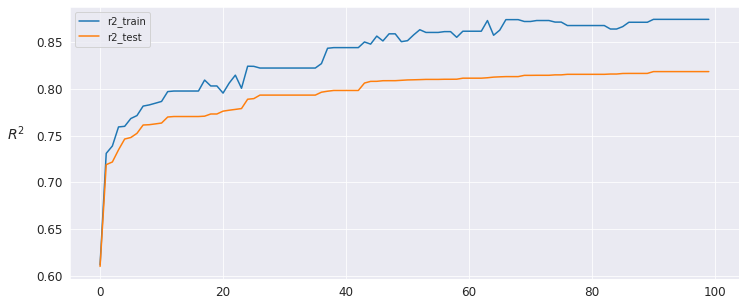

In [ ]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=resultados, x=resultados.index, y='r2_train', label='r2_train')
sns.lineplot(data=resultados, x=resultados.index, y='r2_test', label='r2_test')
plt.ylabel('$R^2$', rotation=0, labelpad=20)
plt.xlabel('')
plt.legend()
plt.show()

Armamos un diccionario con los mejores hiperparametros

In [ ]:
# Armamos un diccionario a partir de 2 listas: la primera es los nombres que tienen los hiperparametros, y la otra son los mejores que se encontraron
mejores_hp = dict(zip(param_names, res.x))
# Además le agregamos aquellos hiperparametros que dejamos fijos (en nuestro caso solo fue el random_state)
mejores_hp.update(FIXED_PARAMS)

In [ ]:
mejores_hp

{'criterion': 'mse',
 'max_depth': 59,
 'max_features': 7,
 'min_samples_leaf': 12,
 'min_samples_split': 13,
 'random_state': 0}

In [ ]:
# Colocamos esos mejores hiperparametros en nuestro modelo
regressor.set_params(**mejores_hp)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=59,
                      max_features=7, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=12, min_samples_split=13,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
# Entrenamos ese arbol que ya tiene los hiperparametros correctos
regressor.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=59,
                      max_features=7, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=12, min_samples_split=13,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
pip install shap

     |████████████████████████████████| 356 kB 7.2 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491656 sha256=dfa96559a999565b8fce637d0ff9a60e81f5510433e9636eb34c00817c0c6c0c
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [ ]:
import shap

In [ ]:
# Utilizamos el explicador de SHAP
explainer = shap.TreeExplainer(regressor)
# Y pedimos que nos otorgue los valores de importancia que tendrá en el dataframe de validacion
shap_values = explainer.shap_values(X_test)

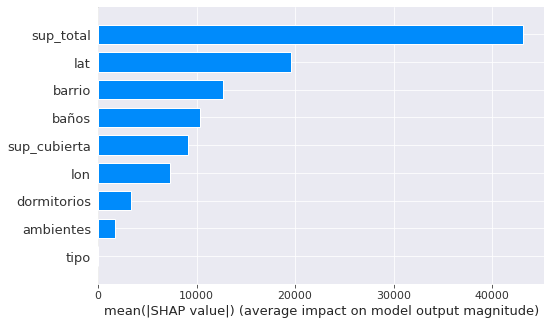

In [ ]:
# Graficamos solo la importancia de cada variable
shap.summary_plot(shap_values, X_test, plot_type="bar")

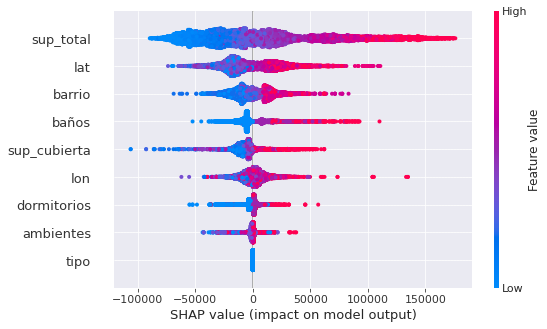

In [ ]:
# Graficamos el impacto de cada variable 
# recordemos, para leer el grafico: 
# - los colores significan los valores de la variable --> ej: un punto de V5 que esté en color fucsia, es un valor alto de V5
# - el eje x significa cuanto impacta sobre el output --> ej: los puntos fucsias de V5 están a la derecha, así que impactan positivamente sobre el output
# Entonces: A mayor valor de V5, mayor valor del output en general. Y así se podría analizar cada variable

shap.summary_plot(shap_values, X_test)

[Text(725.3124508290584, 1063.5652173913045, 'X[7] <= 86.5\nmse = 8190593918.83\nsamples = 35605\nvalue = 190293.686'),
 Text(466.1967374259516, 1016.2956521739131, 'X[7] <= 58.5\nmse = 4207578883.907\nsamples = 27606\nvalue = 160790.402'),
 Text(229.3287515990361, 969.0260869565218, 'X[0] <= -34.597\nmse = 1458284616.918\nsamples = 13627\nvalue = 128001.69'),
 Text(121.3414276789433, 921.7565217391304, 'X[7] <= 45.5\nmse = 808955573.671\nsamples = 7934\nvalue = 113274.142'),
 Text(66.12596314035818, 874.4869565217392, 'X[7] <= 41.5\nmse = 433785504.331\nsamples = 3850\nvalue = 99495.559'),
 Text(41.08970964479086, 827.2173913043479, 'X[0] <= -34.601\nmse = 312903430.449\nsamples = 2141\nvalue = 93970.808'),
 Text(27.971380972213957, 779.9478260869566, 'X[2] <= 176641.453\nmse = 295727740.31\nsamples = 1514\nvalue = 90303.156'),
 Text(18.69185458439936, 732.6782608695653, 'X[1] <= -58.382\nmse = 286270423.505\nsamples = 907\nvalue = 86684.807'),
 Text(13.479383590170762, 685.4086956521

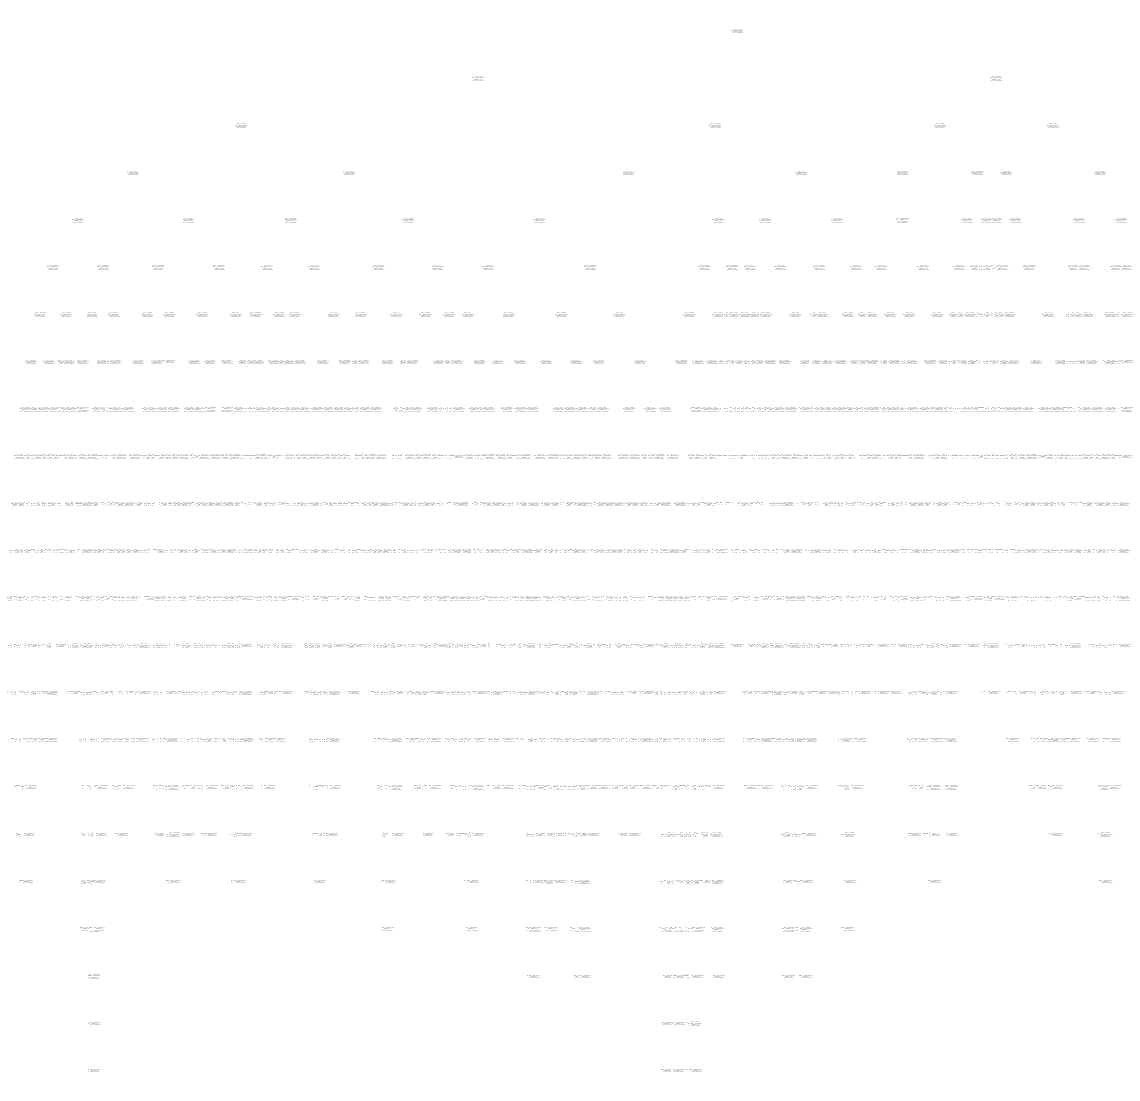

In [ ]:
# Graficamos como queda el arbol terminado
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
tree.plot_tree(regressor) 


##### OPTUNA

In [ ]:
param_names

['criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'max_features']

In [ ]:
regressor = RandomForestRegressor(random_state=0)

In [ ]:
import joblib

In [ ]:
lista_test_scores_cv = []
lista_train_scores_cv = []
lista_test_std_cv = []
lista_test_r2 = []
lista_train_r2 = []

def objective(trial):    

    joblib.dump(study, 'study.pkl')
    
    tree_criterion = trial.suggest_categorical('criterion', ['mse', 'mae']) 
    tree_max_depth = trial.suggest_int('max_depth', 2, 200) 
    tree_min_samples_split = trial.suggest_int('min_samples_split', 10, 100) 
    tree_min_samples_leaf = trial.suggest_int('min_samples_leaf', 5, 50) 
    tree_max_features = trial.suggest_int('max_features', round(cant_columnas*0.1), round(cant_columnas*0.8)) 

    params = {
        'criterion': tree_criterion,
        'max_depth': tree_max_depth,
        'min_samples_split': tree_min_samples_split,
        'min_samples_leaf': tree_min_samples_leaf,
        'max_features': tree_max_features
    }
    
    regressor.set_params(**params)

    ####################################################################################
    ############################# USAMOS CROSS VALIDATION ##############################
    ####################################################################################
    # Ahora en vez de eso calculamos nuestros scores de test de un cross validation
    # Recordemos, este objeto devuelve un array de todos los test_scores y tambien de los train_scores hallados --> nuestra loss será el promedio de los test_scores
    model_i_scores = cross_validate(regressor, X_train, y_train, cv=3, scoring=  make_scorer(eval_metrics), return_train_score=True)
    mean_test_scores = model_i_scores['test_score'].mean()
    # Peeero tambien nos guardamos los promedios de train para poder ver si en general se estuvo overfitteando o no 
    mean_train_scores = model_i_scores['train_score'].mean()
    # Por último, resulta interesante ver cuan volatil fueron esos test_scores. Así que tomamos su desvio standard (std)
    std_test_scores = model_i_scores['test_score'].std()
    
    # Tambien generamos los r cuadrado de train y de test
    model_i_scores_r2 = cross_validate(regressor, X_train, y_train, cv=5, scoring='r2', return_train_score=True)
    mean_test_scores_r2 = model_i_scores_r2['test_score'].mean()
    mean_train_scores_r2 = model_i_scores_r2['train_score'].mean()

    # Ahora guardamos estos datos en las listas vacias que creamos antes, así nos quedan bien guardados
    lista_test_scores_cv.append(mean_test_scores) # test
    lista_train_scores_cv.append(mean_train_scores) # train
    lista_test_std_cv.append(std_test_scores) # std de test
    lista_test_r2.append(mean_test_scores_r2) # train
    lista_train_r2.append(mean_train_scores_r2) # test

    # Definimos que la funcion de perdida sea el promedio de los scores de test
    loss = mean_test_scores
    ####################################################################################
    ####################################################################################
    ####################################################################################

    return loss

In [ ]:
import optuna
from optuna.samplers import TPESampler
sampler = TPESampler(seed=10)  # Make the sampler behave in a deterministic way.

In [ ]:
study = optuna.create_study(sampler=sampler)

[I 2021-08-08 21:35:14,682] A new study created in memory with name: no-name-527fbabf-7d09-45d8-8147-5d2e517bc407


In [ ]:
study.optimize(objective, n_trials=100)

[I 2021-08-08 21:35:32,397] Trial 0 finished with value: 41758.445264919814 and parameters: {'criterion': 'mse', 'max_depth': 128, 'min_samples_split': 78, 'min_samples_leaf': 27, 'max_features': 2}. Best is trial 0 with value: 41758.445264919814.
[I 2021-08-08 23:30:52,581] Trial 1 finished with value: 41573.732820147714 and parameters: {'criterion': 'mae', 'max_depth': 35, 'min_samples_split': 18, 'min_samples_leaf': 36, 'max_features': 7}. Best is trial 1 with value: 41573.732820147714.


In [ ]:
study.best_trial

FrozenTrial(number=99, values=[38701.81274650249], datetime_start=datetime.datetime(2021, 7, 31, 23, 9, 13, 438704), datetime_complete=datetime.datetime(2021, 7, 31, 23, 9, 14, 147337), params={'criterion': 'mse', 'max_depth': 177, 'min_samples_split': 10, 'min_samples_leaf': 7, 'max_features': 7}, distributions={'criterion': CategoricalDistribution(choices=('mse', 'mae')), 'max_depth': IntUniformDistribution(high=200, low=2, step=1), 'min_samples_split': IntUniformDistribution(high=100, low=10, step=1), 'min_samples_leaf': IntUniformDistribution(high=50, low=5, step=1), 'max_features': IntUniformDistribution(high=7, low=1, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=99, state=TrialState.COMPLETE, value=None)

In [ ]:
study.best_value

38701.81274650249

In [ ]:
study.best_params

{'criterion': 'mse',
 'max_depth': 177,
 'max_features': 7,
 'min_samples_leaf': 7,
 'min_samples_split': 10}

In [ ]:
regressor_OPTUNA = regressor.set_params(**study.best_params)

In [ ]:
regressor_OPTUNA.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=177,
                      max_features=7, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=7, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
y_pred = regressor_OPTUNA.predict(X_test)

In [ ]:
y_pred = pd.DataFrame(y_pred, columns=['Precio predicho'])

In [ ]:
test_df = pd.concat([X_test, y_test], axis=1)
test_df['predicho'] = y_pred.values
test_df['error'] = np.abs(test_df.predicho - test_df.precio)
# test_df['error'] = test_df.predicho - test_df.precio
test_df

,lat,lon,barrio,tipo,ambientes,dormitorios,baños,sup_total,sup_cubierta,precio,predicho,error
58957,-34.6269,-58.3870,174292.2379,190445.6283,2.0000,1.0000,1.0000,86.0000,74.0000,86000.0000,91233.3077,5233.3077
113200,-34.5936,-58.4074,266830.9797,190445.6283,2.0000,1.0000,1.0000,38.0000,38.0000,120000.0000,109800.0000,10200.0000
72229,-34.6279,-58.4636,175042.1040,190445.6283,4.0000,3.0000,2.0000,158.0000,150.0000,295000.0000,286025.0000,8975.0000
110285,-34.5941,-58.4432,164674.2338,190445.6283,2.0000,1.0000,1.0000,50.0000,44.0000,101000.0000,104176.4706,3176.4706
136017,-34.5872,-58.4470,174292.2379,190445.6283,2.0000,1.0000,1.0000,37.0000,37.0000,120000.0000,129571.4286,9571.4286
...,...,...,...,...,...,...,...,...,...,...,...,...
22595,-34.5648,-58.4414,249509.7579,190445.6283,4.0000,3.0000,3.0000,120.0000,110.0000,445000.0000,418772.7273,26227.2727
63824,-34.5974,-58.4475,164674.2338,190445.6283,2.0000,1.0000,1.0000,39.0000,39.0000,86500.0000,84038.4615,2461.5385
4423,-34.6226,-58.4597,175042.1040,190445.6283,3.0000,2.0000,1.0000,61.0000,55.0000,112000.0000,133083.3333,21083.3333
43458,-34.6031,-58.3993,174292.2379,190445.6283,3.0000,2.0000,1.0000,96.0000,70.0000,195000.0000,183500.0000,11500.0000


In [ ]:
error_por_sup = test_df.groupby(by='sup_total').agg({'error':['mean','count']}).reset_index()
error_por_sup.columns = ['sup_total', 'mean_error', 'count']
error_por_sup

,sup_total,mean_error,count
0,35.0000,10406.8173,161
1,36.0000,12168.2999,135
2,37.0000,7820.7947,220
3,38.0000,10829.4539,291
4,39.0000,10627.6455,220
...,...,...,...
143,181.0000,0.0000,5
144,182.0000,38408.1629,4
145,184.0000,10250.0000,8
146,185.0000,151708.3333,3


In [ ]:
error_por_sup['int'] = pd.cut(error_por_sup.sup_total, bins  = 10)
error_por_sup

,sup_total,mean_error,count,int
0,35.0000,10406.8173,161,"(34.849, 50.1]"
1,36.0000,12168.2999,135,"(34.849, 50.1]"
2,37.0000,7820.7947,220,"(34.849, 50.1]"
3,38.0000,10829.4539,291,"(34.849, 50.1]"
4,39.0000,10627.6455,220,"(34.849, 50.1]"
...,...,...,...,...
143,181.0000,0.0000,5,"(170.9, 186.0]"
144,182.0000,38408.1629,4,"(170.9, 186.0]"
145,184.0000,10250.0000,8,"(170.9, 186.0]"
146,185.0000,151708.3333,3,"(170.9, 186.0]"


In [ ]:
error_por_sup_int = error_por_sup.groupby(error_por_sup['int']).mean().drop(['sup_total', 'count'], axis=1).reset_index()
error_por_sup_int['bin_centres'] = error_por_sup_int['int'].apply(lambda x: round(x.mid))
error_por_sup_int['count'] = error_por_sup.groupby(error_por_sup['int']).sum()['count'].values
error_por_sup_int

,int,mean_error,bin_centres,count
0,"(34.849, 50.1]",12028.4594,42,4049
1,"(50.1, 65.2]",17391.5119,58,3138
2,"(65.2, 80.3]",22650.5566,73,2487
3,"(80.3, 95.4]",29385.1678,88,2921
4,"(95.4, 110.5]",34575.9908,103,1102
5,"(110.5, 125.6]",40220.2015,118,557
6,"(125.6, 140.7]",36209.6018,133,455
7,"(140.7, 155.8]",40654.2904,148,241
8,"(155.8, 170.9]",55679.6849,163,128
9,"(170.9, 186.0]",48251.2853,178,40


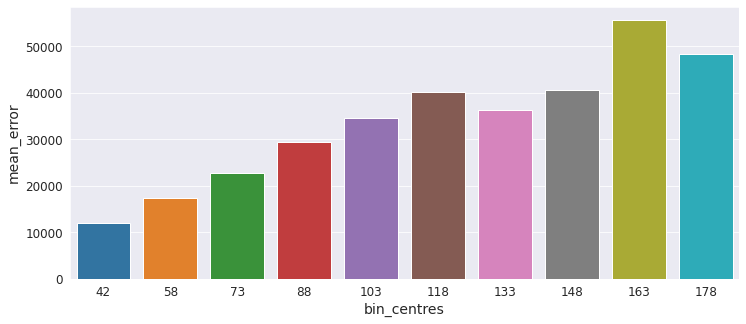

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,5))

sns.barplot(data=error_por_sup_int, x='bin_centres', y='mean_error')
# sns.lineplot(data=error_por_sup_int, x='bin_centres', y='count')
plt.show()

In [ ]:
error_por_barrio = test_df.groupby(by='barrio').agg({'error':['mean','count']}).reset_index()
error_por_barrio.columns = ['barrio', 'mean_error', 'count']
error_por_barrio

,barrio,mean_error,count
0,139421.3603,17217.0318,583
1,150443.1330,16576.1169,119
2,152764.9016,19640.0573,151
3,153614.1446,16935.6362,156
4,153633.2909,28809.8378,221
5,157166.7622,27496.0317,2
6,159236.9784,13109.5329,176
7,164674.2338,12658.2108,1397
8,174292.2379,23738.2867,2235
9,175042.1040,25955.4148,482


In [ ]:
barrio_code = pipe_fitted['catEncoder'].encoder_dict_['barrio']
inv_barrio_code = {v: k for k, v in barrio_code.items()}
inv_barrio_code

{118999.0411764706: 'San Cristobal',
 139421.36026422764: 'Balvanera',
 150443.13300492612: 'Villa Luro',
 152764.90161290322: 'Boedo',
 153614.1446153846: 'Floresta',
 153633.29085457273: 'San Telmo',
 157166.76217765044: 'Liniers',
 159236.97844827586: 'Paternal',
 164674.23376324275: 'Villa Crespo',
 174292.23786824293: 'Otros',
 175042.1039861352: 'Flores',
 178240.80075337033: 'Almagro',
 178539.24973089344: 'Villa del Parque',
 189649.04755434784: 'Saavedra',
 194247.00045085663: 'Villa Urquiza',
 199852.41925823543: 'Caballito',
 200329.98073217727: 'Colegiales',
 203171.87882219706: 'Parque Centenario',
 209312.69374313942: 'Villa Devoto',
 229566.9433548387: 'Palermo',
 231593.7518987342: 'Nuñez',
 235270.03017902814: 'Barrio Norte',
 249509.75785677487: 'Belgrano',
 266830.9797065251: 'Recoleta'}

In [ ]:
error_por_barrio['barrio'] = error_por_barrio.barrio.map(inv_barrio_code)

In [ ]:
error_por_barrio.sort_values(by='count', inplace=True)
error_por_barrio

,barrio,mean_error,count
5,Liniers,27496.0317,2
12,Saavedra,32855.8333,4
19,Nuñez,30211.9295,8
17,Villa Devoto,19819.8006,33
1,Villa Luro,16576.1169,119
2,Boedo,19640.0573,151
3,Floresta,16935.6362,156
6,Paternal,13109.5329,176
4,San Telmo,28809.8378,221
11,Villa del Parque,19833.5434,272


#### **Comparación de Modelos**

##### **Comparación de los tres modelos**

###### A quien le fue mejor?

In [ ]:
print(f"El RMSE al que llegó GP_MINIMIZE fue {res.fun}")
print(f"El RMSE al que llegó OPTUNA fue {study.best_value}")

El RMSE al que llegó GP_MINIMIZE fue 38542.573993127975
El RMSE al que llegó OPTUNA fue 38701.81274650249


In [ ]:
if float(res.fun) > float(study.best_value):
    print("El ganador fue OPTUNA porque llegó al menor valor")
    
elif float(res.fun) < float(study.best_value):
    print("El ganador fue GP_MINIMIZE porque llegó al menor valor")
    
elif float(res.fun) == float(study.best_value):
    print("Empate")

El ganador fue GP_MINIMIZE porque llegó al menor valor


### **Interpretación de Modelos**
***

#### **Responder preguntas planteadas**

#### **Distribución de los errores**

#### **Fallas de los modelos**

### **Cierre**
***

#### **Conclusiones**